#Linear Regression

In [5]:
#introducing sklearn, which is the "standard" machine learning package for python
from sklearn import linear_model


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# We want to find the "best" line that approximates our set of datapoints 
# with only 2 parameters we can generate any element of the family of straight lines

# y-intercept / b0 -> the height of the line
# gradient/ coeficient /b1  -> the slope of the line 

In [7]:
# generating an array of x values
x = np.arange(0,10,1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

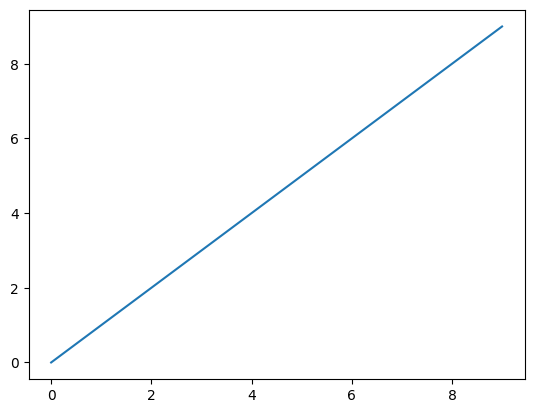

In [8]:
# y = b0 + b1 + y --> b0 = 0 , b1 = 1
y = x
#y2 = x + 3. --> y = 1x + 3
#y3 = x - 1
#here we are changing the y-intercept, which controls the height of the line

plt.plot(x,y)
#plt.plot(x,y2)
#plt.plot(x,y3)
plt.show()

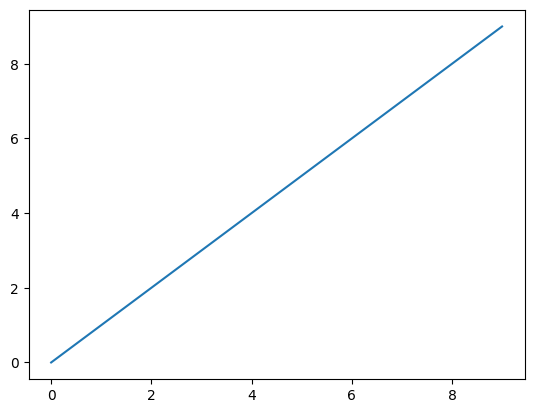

In [9]:
y = x 
#y2 = 2*x 
#y3 = -3*x
#here we are changing the gradient, which controls the slope of the line

plt.plot(x,y)
#plt.plot(x,y2)
#plt.plot(x,y3)
plt.show()

In [10]:
# SAT is a standardized test in the USA (standardized test widely used for college admissions in the United States), GPA (Grade Point Average) is the grade point average 
#that a student gets out of highschool

# we are interested in understanding if the SAT score is a good predictor of GPA
# maybe this way if we have a foreign student, they can just take the SAT and get an "equivalent" GPA
data = pd.read_csv("SAT_GPA.csv")
data.head()

,SAT,GPA
0,80,2.40
1,30,2.52
2,126,2.54
3,51,2.74
4,59,2.83


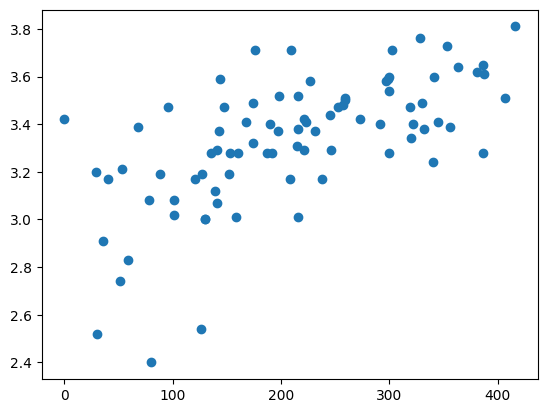

In [11]:
# SAT is the independent variable in this case (what we think helps us predict GPA)
# GPA is the dependent variable (what we want to predict/measure)
x = data[['SAT']]
y = data['GPA']

plt.scatter(x,y)
plt.show()

In [12]:
from sklearn import linear_model

# to perform the linear regression I use the sklearn implementation of linear regression
# we will use sklearn a lot

# we first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet
model = linear_model.LinearRegression()

In [13]:
# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

2.9804345735119386

array([0.00165569])

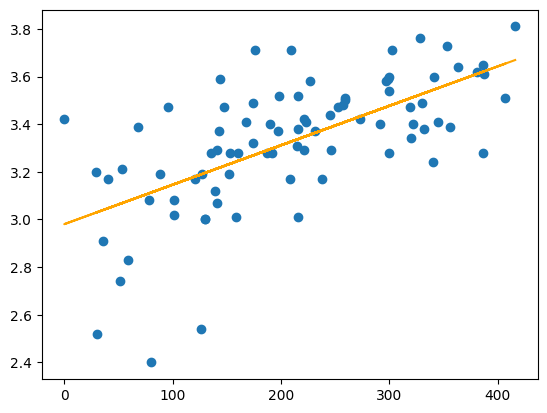

In [14]:
# this means that under this model, average students have a baseline 2.98 GPA 
# and each point of SAT score improves this baseline score by 1/1000 of a point, all other things being equal 
# Let's visualize this result
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

In [15]:
# what does this mean?
# well, under this model we would say, for example, that the expected GPA for a SAT score of 100 is 3.15 
# and the expected GPA for a 300 score SAT would be around 3.5 

In [16]:
# we can now use this model to predict a new point, i.e. how much GPA would a student with a SAT score of x acheive 
# say SAT scores of 110 or 270
new_points = pd.DataFrame([110,270],columns=['SAT'])
new_points

,SAT
0,110
1,270


In [17]:
# we call "predict" on our trained model 
display(result.predict(new_points))
# and for peace of mind (manualy done)
display(result.intercept_ + result.coef_[0]*110)
display(result.intercept_ + result.coef_[0]*270)

array([3.16256026, 3.42747035])

3.162560259022148

3.4274703470369983

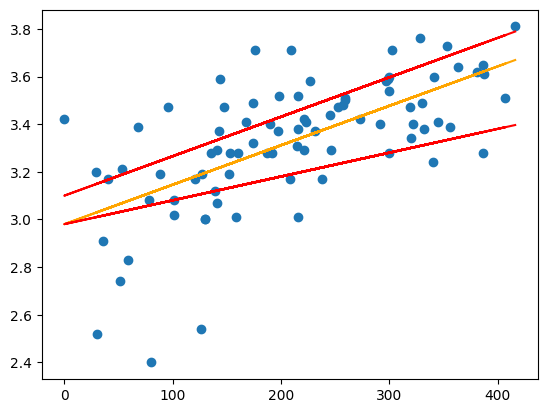

In [18]:
# not amazing, but any other line would be "worse"
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')

#distortion in coeficient
regression_line = (3.1) + result.coef_[0]*x
plt.plot(x, regression_line, c = 'red')

#distortion in intercept
regression_line = result.intercept_ + 0.001*x
plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [19]:
#Colab

In [20]:
# how do we measure "good/best/worse fit"?
# we check the distance from each point to the line, the smaller this distance, the better the line approximates that point
# so we take all of these distances and sum them to get a "total error"
# the smaller this total error, the better the fit 

In [21]:
# we actually use the square of the distance for
# - technical reasons
# - to penalize large errors disproportionately (why would we want to do this?)
# and we call this error measure "mean square error" (MSE). We will use MSE a lot

In [22]:
# skearn has a helpful set of metrics which include MSE
from sklearn.metrics import mean_squared_error

#and with it we can see our other choices for lines above were... not juducious
display(mean_squared_error(result.predict(x),y))
display(mean_squared_error(3.1 + result.coef_[0]*x,y))
display(mean_squared_error(result.intercept_ + 0.001*x,y))

0.04330086666167266

0.05759675787294472

0.06713308703021204

In [23]:
# minimizing MSE is how we choose our line, so it's not surprising we get the lowest MSE value from that line
# there is another widely used metric of quality of reression, the r value

# the r value is the pearson correlation coefficient and goes between -1 and 1, and states the "quality of the fit"
# often the metric shown is the R^2 (R squared) = r^2 , this number goes from 0 to 1 and is the main metric 
# of the quality of the fit.

#sklearn models show R^2 as a score by default
result.score(x,y)

0.40600391479679754

In [24]:
# 40% is not amazing, but not nothing as well.
# I wouldn't feel comfortable assigning a GPA score just based on the SAT score, however

In [25]:
#LET'S talk a little bit about the r2 (Slides)

In [26]:
#DIY do it yourself
#import our old friend, the california_housing_train.csv and try to predict the housing prices from number of rooms

In [27]:
#solution
data = pd.read_csv('sample_data/california_housing_train.csv')
display(data.head())

y = data['median_house_value']
x = data[['total_rooms']]

result = linear_model.LinearRegression().fit(x,y)
regression_line = result.coef_[0]*x + result.intercept_

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data/california_housing_train.csv'

In [ ]:
result.score(x,y)
#the R^2 value gives us a notion of how good is our fit.
#in this case it is really bad

In [ ]:
## Multilinear regression

In [ ]:
# how can we improve it?
# why not try using other variables all together? 

In [ ]:
# THIS IS PROBABLY THE MOST IMPORTANT LINE IN THIS NOTEBOOK
#How do we choose which variables to use?

#The best variables are those that:

#1- Have a high correlation with the target (you want to predict, always the y)
#So we can comput the correlation between all my columns with the one we want to predict and the higher the correlation,
#the more we know one influences the other.

#2- And low correlation between themselves because we don't want double effect.
#If two independet variables are very correlated they are probably mesuring the same effects.

#e.g.The number of steps that i give with the number of calories that I burn in the day.
#The more steps I give the bigger the calories that I burn. It's a good predictor, they are higly correlated.
#Now if I'm going to pick a second predictor. Let's say that I can choose between total distance that I walk in a day ir the total
#weight that I carry in a day. Which one would I choose?

#the variables that has different effect possible from each others


In [ ]:
# multi linear regression -> one dependent variable (y) but multiple independent variable (x)
# y = b_1 * x1 + b_2 * x2 + b_0
# this model is still a straight line, but has 2 inputs (x1, x2)

In [ ]:
X = data[['median_income','total_rooms']]
y = data['median_house_value']

In [ ]:
# from now on it's clear sailing, as before
model = linear_model.LinearRegression()
result = model.fit(X,y)

In [ ]:
#if I ask for the coeficients of this model how many will I get?

In [ ]:
# still not amazing R^2
result.score(X,y)

In [ ]:
# we can now use this model to predict the price of a house given an income and an age
new_houses = pd.DataFrame([{'median_income':1.432,'total_rooms':2},
 {'median_income':2.769,'total_rooms':5},
 {'median_income':1.962,'total_rooms':3},
 {'median_income':3.125,'total_rooms':5}])
new_houses

In [ ]:
result.predict(new_houses)
# predictions not amazing but at least directionally correct.

## Logistic regression

In [28]:
from sklearn import linear_model


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [29]:
data = pd.read_csv('Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# let's try to use the variables "tenure","senior citizen" and "monthly charges" to predict "churn"
# PS - churn is the name given to the event of a client abandoning a company
X = data[['tenure','SeniorCitizen','MonthlyCharges']]
X.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [31]:
y = pd.DataFrame(data=data, columns=['Churn'])
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [32]:
from sklearn.preprocessing import StandardScaler

#notice us all fancy, doing a standard scaler on the data
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)
#ADVANCED: this is a numeric method, because solving this problem explicitly is a bit hard  
model = linear_model.LogisticRegression(random_state=0)
result = model.fit(scaled_x, data['Churn'])

In [33]:
new_clients = pd.DataFrame([{'tenure':2,'SeniorCitizen':1,'MonthlyCharges':90.20},
 {'tenure':40,'SeniorCitizen':1,'MonthlyCharges':32.45},
 {'tenure':3,'SeniorCitizen':0,'MonthlyCharges':85.15},
 {'tenure':44,'SeniorCitizen':0,'MonthlyCharges':40.45}])
new_clients

,tenure,SeniorCitizen,MonthlyCharges
0,2,1,90.20
1,40,1,32.45
2,3,0,85.15
3,44,0,40.45


In [34]:
#You will need to do the same kind of preprocessing to the data you want to use your model on
#so you use the same standard scaller by transforming the new data with the method transform
transformed_test = transformer.transform(new_clients)

In [35]:
result.predict(transformed_test)

array(['Yes', 'No', 'Yes', 'No'], dtype=object)

In [36]:
# what about R^2 score?
# in this sense it does not make a lot of sense to use R^2 score because this is a *classification* exercise
# we can still use it but it's not as interesting a metric.
# instead we use "accuracy", i.e., what % of observations do we get right

from sklearn.metrics import accuracy_score

accuracy_score(result.predict(scaled_x),y)

0.7911401391452506

In [ ]:
# 80% aqccuracy is nothing to scoff at.